## Sprint 機械学習スクラッチ 線形回帰

In [1]:
import numpy as np

## 線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$

$x$ : 特徴量ベクトル

$\theta$ : パラメータベクトル

$n$ : 特徴量の数

$x_j$ : j番目の特徴量

$\theta_j$ : j番目のパラメータ（重み）

特徴量の数$n$は任意の値に対応できる実装にしてください。

なお、ベクトル形式で表すと以下のようになります。

$$
h_\theta(x) = \theta^T \cdot x.
$$

In [2]:
np.random.seed(0)
# 100行4列の行列
X_train = np.random.randn(400).reshape(-1, 4)
# thetaは未知のパラメーター
theta = np.random.randn(4)
# 目的変数
y_train = np.random.randn(100)
# yのtrain_data

# 同様な検証データも用意、50行4列
X_test = np.random.randn(200).reshape(-1, 4)
y_test = np.random.randn(50)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, theta.shape

((100, 4), (100,), (50, 4), (50,), (4,))

In [3]:
def _linear_hypothesis(X, theta):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    theta : 次の形のndarray, shape (n_samples, 1)
      係数
    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果
    """
    hypo = np.dot(X, theta)
    return hypo

In [4]:
# モデルの形
_linear_hypothesis(X_train, theta).shape, _linear_hypothesis(X_test, theta).shape

((100,), (50,))

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

$\alpha$ : 学習率

$i$ : サンプルのインデックス

$j$ : 特徴量のインデックス

In [5]:
def _gradient_descent(X, y, theta):
    """
    theta : 係数
    alpha : 学習率
    m : サンプル数
    n　: 特徴量数
    """
    alpha = 0.1
    m, n = X.shape
    theta -= np.dot(_linear_hypothesis(X, theta) - y, X) * (alpha / m)
    print(theta.shape)

In [6]:
#　thetaを更新する式
_gradient_descent(X_train, y_train, theta)

(4,)


## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 $h_\theta(x)$ の出力が推定結果です。

- 下のScratchLinearRegressionクラスに追加

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解値

なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

In [7]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    # mは入力されるデータ数
    m = y.shape[0]
    # 各要素の差をとって二乗した合計をmで除す
    mse = np.power((y_pred - y), 2).sum() / m
    return mse

## 【問題5】目的関数
以下の数式で表される線形回帰の **目的関数（損失関数）** を実装してください。そして、これを`self.loss`, `self.val_loss`に記録するようにしてください。

目的関数（損失関数） $J(\theta)$ は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$
$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解値

- 以下のScratchLinearRegressionクラスに追加

### 実装したスクラッチ

In [8]:
class ScratchLinearRegression():
    import numpy as np
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self._theta : 次の形のndarray, shape (n_features,)
      パラメータ（self.coef_　と　self.intercept_からなる）
    self.coef_ : 次の形のndarray, shape (n_features,)
    self.intercept_ : int or float
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias=False, verbose=False, random_state=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # 乱数のコントロール(int)
        self.random_state = random_state
        
    def _linear_hypothesis(self, X, theta):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        theta : 次の形のndarray, shape (n_samples, 1)
          係数      
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        hypo = np.dot(X, theta)
        return hypo

    def _gradient_descent(self, X, y):
        """
        self.m : サンプル数
        self._theta　: パラメーター（係数, 切片）
        """
        self._theta -= np.dot(self._linear_hypothesis(X, self._theta) - y, X) * (self.lr / self.m)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
        """
        """
        X の　ndarray.shape (m, n)
        m : サンプル数
        n　: 特徴量数
        """
        # 変数情報を管理
        self.X = X
        self.m, self.n = self.X.shape

        # 切片を計算する場合はXの配列の最後の列に１を追加, nの数を１追加
        if self.no_bias is False:
            self.n += 1
            self.X = np.concatenate([self.X, np.ones(self.m).reshape(self.m, -1)], axis=1)

        # fitが呼び出されるとtheta（係数と切片）を初期化
        # random_stateが設定されている場合はseed設定
        if type(self.random_state) == int:
            np.random.seed(self.random_state)
        self._theta = np.random.randn(self.n)
            
        # 検証データが訓練データと同様の特徴量数（n)を持つ場合は同様の学習、予測処理を行わせたいため、flagを立てる
        val_flag = True if type(X_val) is np.ndarray and X_val.shape[1]==X.shape[1] else False
        # iterの回数探索を繰り返す
        for i in range(self.iter):
            
            # 　self._thetaの更新
            self._gradient_descent(self.X, y)           
            
            # 訓練データの予測値、損失関数の計算し記録
            y_pred = self.predict(X)
            self.loss[i] = self._loss_func(y_pred, y)
            
            # val_dataがある時は同様の処理
            if val_flag:
                y_val_pred = self.predict(X_val)
                self.val_loss[i] = self._loss_func(y_val_pred, y_val)
            
            #verboseをTrueにした際は学習過程を出力
            if self.verbose is True:
                print('iter:{}'.format(i+1))
                if self.no_bias is False:
                    print('coef_:{}'.format(self._theta[:self.n-1]))
                    print('intercept_:{}'.format(self._theta[-1]))
                    print('train_loss:{}'.format(self.loss[i]))
                else:
                    print('coef_:{}'.format(self._theta))
                    print('train_loss:{}'.format(self.loss[i]))
                if val_flag:
                    print('val_loss:{}'.format(self.val_loss[i]))
            
        # iter回の探索後、係数と切片の変数に分ける
        if self.no_bias is False:
            self.coef_, self.intercept_ = self._theta[:self.n-1], self._theta[-1]
        else:
            self.coef_ = self._theta
            self.intercept_ = None

    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (m_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # fit　が呼び出されていない場合は　エラー
        if self._theta is False:
            print("It hasn't been fitted yet")
        else:
            m, n = X.shape
            #　切片を計算している場合はX の最後の列に１を追加
            if self.no_bias is False:
                X = np.concatenate([X, np.ones(m).reshape(m, -1)], axis=1)
            y_pred = self._linear_hypothesis(X, self._theta)
            return y_pred

    def _loss_func(self, y_pred, y):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
        y : 次の形のndarray, shape (n_samples,)
        正解値
        Returns
        ----------
        mse : numpy.float
        平均二乗誤差
        """
        # 各要素の差をとって二乗した合計をmで除す
        m = y_pred.shape[0]
        mse = np.power((y_pred - y), 2).sum() / m
        loss_value = mse/2
        return loss_value

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

1. notebook冒頭で作成したrandom のデータで検証

In [9]:
# Scratchの学習と推定
slr = ScratchLinearRegression(num_iter=100, lr=0.1, verbose=True, random_state=0)
slr.fit(X_train, y_train, X_test, y_test)
y_slr_pred = slr.predict(X_test)

iter:1
coef_:[1.52160438 0.37761253 0.8957886  1.97683343]
intercept_:1.6663238906297928
train_loss:6.431233351828564
val_loss:5.09295813858082
iter:2
coef_:[1.31102981 0.35559947 0.81972659 1.74283576]
intercept_:1.487883683584514
train_loss:5.139966102786418
val_loss:4.134217163873746
iter:3
coef_:[1.12821638 0.33433577 0.74995964 1.5354518 ]
intercept_:1.3295782212959506
train_loss:4.134593330381054
val_loss:3.381868604511151
iter:4
coef_:[0.96957679 0.3139794  0.6859469  1.35163203]
intercept_:1.1890653443384271
train_loss:3.3511816961047964
val_loss:2.790812869199406
iter:5
coef_:[0.83198213 0.29463969 0.62719467 1.18867925]
intercept_:1.0642814867129669
train_loss:2.7402098724650177
val_loss:2.3259160968055372
iter:6
coef_:[0.71270372 0.27638654 0.57325232 1.04420753]
intercept_:0.9534079875240868
train_loss:2.2632982402379813
val_loss:1.9597886174173735
iter:7
coef_:[0.60936223 0.25925826 0.52370862 0.91610596]
intercept_:0.8548415269722147
train_loss:1.890684792159358
val_loss:

In [10]:
# sklearnの学習と推定
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [11]:
# スクラッチの係数、切片
slr.coef_, slr.intercept_

(array([-0.01412393,  0.10161034, -0.07135112, -0.09349492]),
 0.0186539857018776)

In [12]:
# sklearnの係数、切片
lr.coef_, lr.intercept_

(array([-0.01379493,  0.10211151, -0.07235814, -0.09351553]),
 0.018307308256512677)

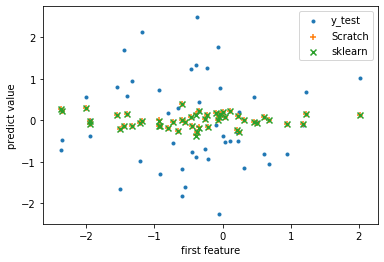

In [13]:
# 最初の特徴量に対する予測値の分布
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test[:, 0], y_test, label='y_test', marker='.')
plt.scatter(X_test[:, 0], y_slr_pred, label='Scratch', marker='+')
plt.scatter(X_test[:, 0], y_pred, label='sklearn', marker='x')
plt.xlabel('first feature')
plt.ylabel('predict value')
plt.legend();

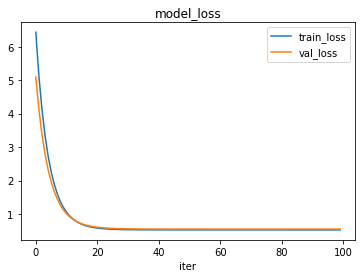

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(slr.iter)], slr.loss, label='train_loss')
plt.plot([i for i in range(slr.iter)], slr.val_loss, label='val_loss')
plt.title('model_loss')
plt.xlabel('iter')
plt.legend()
plt.show()

- 損失関数の下落がみて取れる
- sklearnとScratchの予測値、係数を比較すると $10^{-3}$ あたりまでの精度で一致していることがみて取れる

In [15]:
# Scratchの学習と推定、iterを１００から500回へ変更
slr = ScratchLinearRegression(num_iter=500, lr=0.1, verbose=True, random_state=0)
slr.fit(X_train, y_train, X_test, y_test)
y_slr_pred = slr.predict(X_test)

iter:1
coef_:[1.52160438 0.37761253 0.8957886  1.97683343]
intercept_:1.6663238906297928
train_loss:6.431233351828564
val_loss:5.09295813858082
iter:2
coef_:[1.31102981 0.35559947 0.81972659 1.74283576]
intercept_:1.487883683584514
train_loss:5.139966102786418
val_loss:4.134217163873746
iter:3
coef_:[1.12821638 0.33433577 0.74995964 1.5354518 ]
intercept_:1.3295782212959506
train_loss:4.134593330381054
val_loss:3.381868604511151
iter:4
coef_:[0.96957679 0.3139794  0.6859469  1.35163203]
intercept_:1.1890653443384271
train_loss:3.3511816961047964
val_loss:2.790812869199406
iter:5
coef_:[0.83198213 0.29463969 0.62719467 1.18867925]
intercept_:1.0642814867129669
train_loss:2.7402098724650177
val_loss:2.3259160968055372
iter:6
coef_:[0.71270372 0.27638654 0.57325232 1.04420753]
intercept_:0.9534079875240868
train_loss:2.2632982402379813
val_loss:1.9597886174173735
iter:7
coef_:[0.60936223 0.25925826 0.52370862 0.91610596]
intercept_:0.8548415269722147
train_loss:1.890684792159358
val_loss:

val_loss:0.5502885682072547
iter:280
coef_:[-0.01379494  0.1021115  -0.07235813 -0.09351553]
intercept_:0.018307311081483528
train_loss:0.523487780214757
val_loss:0.5502885682943017
iter:281
coef_:[-0.01379494  0.1021115  -0.07235813 -0.09351553]
intercept_:0.01830731090614476
train_loss:0.5234877802147571
val_loss:0.55028856837597
iter:282
coef_:[-0.01379494  0.1021115  -0.07235813 -0.09351553]
intercept_:0.018307310741696
train_loss:0.5234877802147568
val_loss:0.5502885684525914
iter:283
coef_:[-0.01379494  0.1021115  -0.07235813 -0.09351553]
intercept_:0.018307310587460338
train_loss:0.5234877802147568
val_loss:0.5502885685244783
iter:284
coef_:[-0.01379494  0.1021115  -0.07235813 -0.09351553]
intercept_:0.018307310442802975
train_loss:0.5234877802147568
val_loss:0.5502885685919224
iter:285
coef_:[-0.01379494  0.1021115  -0.07235813 -0.09351553]
intercept_:0.018307310307128614
train_loss:0.5234877802147568
val_loss:0.5502885686551988
iter:286
coef_:[-0.01379494  0.1021115  -0.072358

val_loss:0.5502885696154975
iter:480
coef_:[-0.01379493  0.10211151 -0.07235814 -0.09351553]
intercept_:0.018307308256520573
train_loss:0.5234877802147566
val_loss:0.5502885696154977
iter:481
coef_:[-0.01379493  0.10211151 -0.07235814 -0.09351553]
intercept_:0.018307308256520088
train_loss:0.5234877802147567
val_loss:0.550288569615498
iter:482
coef_:[-0.01379493  0.10211151 -0.07235814 -0.09351553]
intercept_:0.01830730825651963
train_loss:0.5234877802147566
val_loss:0.5502885696154982
iter:483
coef_:[-0.01379493  0.10211151 -0.07235814 -0.09351553]
intercept_:0.0183073082565192
train_loss:0.5234877802147566
val_loss:0.5502885696154983
iter:484
coef_:[-0.01379493  0.10211151 -0.07235814 -0.09351553]
intercept_:0.018307308256518794
train_loss:0.5234877802147567
val_loss:0.5502885696154987
iter:485
coef_:[-0.01379493  0.10211151 -0.07235814 -0.09351553]
intercept_:0.01830730825651842
train_loss:0.5234877802147567
val_loss:0.5502885696154988
iter:486
coef_:[-0.01379493  0.10211151 -0.0723

In [16]:
# スクラッチの係数、切片
slr.coef_, slr.intercept_

(array([-0.01379493,  0.10211151, -0.07235814, -0.09351553]),
 0.01830730825651489)

In [17]:
# sklearnの係数、切片
lr.coef_, lr.intercept_

(array([-0.01379493,  0.10211151, -0.07235814, -0.09351553]),
 0.018307308256512677)

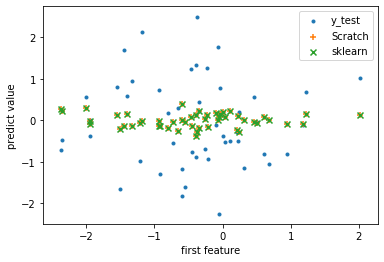

In [18]:
# 最初の特徴量に対する予測値の分布
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test[:, 0], y_test, label='y_test', marker='.')
plt.scatter(X_test[:, 0], y_slr_pred, label='Scratch', marker='+')
plt.scatter(X_test[:, 0], y_pred, label='sklearn', marker='x')
plt.xlabel('first feature')
plt.ylabel('predict value')
plt.legend();

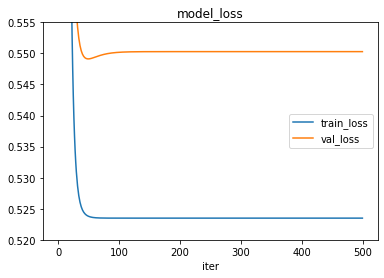

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(slr.iter)], slr.loss, label='train_loss')
plt.plot([i for i in range(slr.iter)], slr.val_loss, label='val_loss')
plt.title('model_loss')
plt.xlabel('iter')
plt.legend()
plt.ylim(0.52, 0.555)
plt.show()

 - iter を100 から　500回まで回数をあげると切片以外は完全に一致した、切片は$10^{-14}$の誤差
 - 損失関数のグラフを拡大してみると、iter 50回あたりで、val_losが上昇していることがみて取れる（過学習が進んでいる）

2. House Price コンペティションのデータで検証

In [20]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 80)
df = pd.read_csv('train.csv', index_col= 'Id')
# features = ['GrLivArea', 'YearBuilt', 'OverallQual', 'GarageCars']
features = ['GrLivArea', 'YearBuilt', 'OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd']
# 説明変数(特徴量)を抽出
X_df = df.loc[:, features]
y_df = df.loc[:, 'SalePrice']
X = X_df.values
y = y_df.values

# 学習データ、検証データに分割
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=0)

In [21]:
# Scratchの学習と推定
slr = ScratchLinearRegression(num_iter=100, lr=0.1, verbose=True, random_state=0)
slr.fit(X_train2, y_train2, X_test2, y_test2)
y_slr_pred = slr.predict(X_test2)

iter:1
coef_:[2.95806924e+07 3.47118684e+07 1.14904348e+05 3.47049301e+04
 9.33119224e+06 2.05491365e+07 2.21659695e+07 2.99639171e+04
 1.21885395e+05 3.49110935e+07]
intercept_:17548.565653449707
train_loss:2.7918978824137966e+22
val_loss:2.8000724704448773e+22
iter:2
coef_:[-3.69469915e+13 -4.62606237e+13 -1.45020642e+11 -4.26886597e+10
 -1.14509883e+13 -2.57038224e+13 -2.81577557e+13 -3.77464124e+10
 -1.56830085e+11 -4.65714468e+13]
intercept_:-23453920601.472084
train_loss:4.718152077757878e+34
val_loss:4.7309219168200185e+34
iter:3
coef_:[4.79950077e+19 6.01669002e+19 1.88503465e+17 5.54637696e+16
 1.48763515e+19 3.33904373e+19 3.65828000e+19 4.90519908e+16
 2.03830340e+17 6.05715098e+19]
intercept_:3.0504955549404612e+16
train_loss:7.973560537591415e+46
val_loss:7.995106203174303e+46
iter:4
coef_:[-6.23921946e+25 -7.82171066e+25 -2.45052237e+23 -7.21016702e+22
 -1.93388931e+25 -4.34066347e+25 -4.75567186e+25 -6.37667008e+22
 -2.64976401e+23 -7.87431082e+25]
intercept_:-3.96565259

/Users/ikeda/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:175: RuntimeWarning: overflow encountered in power


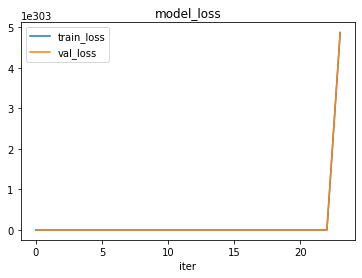

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(slr.iter)], slr.loss, label='train_loss')
plt.plot([i for i in range(slr.iter)], slr.val_loss, label='val_loss')
plt.title('model_loss')
plt.xlabel('iter')
plt.legend()
plt.show()

- 途中で損失関数が inf になりうまく予測できていない
- 発散してしまっているので、学習率を下げてみて再度検証

In [23]:
# Scratchの学習と推定
slr = ScratchLinearRegression(num_iter=100, lr=10**-7, verbose=True, random_state=0)
slr.fit(X_train2, y_train2, X_test2, y_test2)
y_slr_pred = slr.predict(X_test2)

iter:1
coef_:[ 3.13447430e+01  3.51120252e+01  1.09364135e+00  2.27559589e+00
  1.11987484e+01  1.95718596e+01  2.31160570e+01 -1.21393140e-01
  1.86666462e-02  3.53216916e+01]
intercept_:0.16159199277075653
train_loss:3356894271.748768
val_loss:3523962051.683826
iter:2
coef_:[ 2.39783831e+01  2.35632000e+01  1.06352385e+00  2.26760985e+00
  9.07893182e+00  1.44171335e+01  1.71242255e+01 -1.29175544e-01
 -1.62781851e-02  2.36612681e+01]
intercept_:0.1556864586821757
train_loss:1964172271.323966
val_loss:2170037405.6165614
iter:3
coef_:[ 2.76600911e+01  2.59207208e+01  1.07688937e+00  2.27239898e+00
  1.03844942e+01  1.69490582e+01  1.95574785e+01 -1.25652316e-01
 -4.22253559e-03  2.60009775e+01]
intercept_:0.1568319948063546
train_loss:1804516378.8795018
val_loss:2003715621.9844072
iter:4
coef_:[ 2.79925990e+01  2.41342792e+01  1.07718883e+00  2.27332528e+00
  1.06528688e+01  1.71513800e+01  1.94418354e+01 -1.25538249e-01
 -6.31281205e-03  2.41691187e+01]
intercept_:0.15587697905596956

In [24]:
# sklearnの学習と推定
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train2, y_train2)
y_pred = lr.predict(X_test2)

In [25]:
# スクラッチの係数、切片
slr.coef_, slr.intercept_

(array([ 6.92493007e+01, -4.49555711e+00,  1.35244366e+00,  2.38813489e+00,
         4.05114854e+01,  4.56662434e+01,  2.74153367e+01, -7.23603615e-02,
         1.95828514e-02, -7.20388265e+00]),
 0.13776842417259416)

In [26]:
# sklearnの係数、切片
lr.coef_, lr.intercept_

(array([ 5.81931025e+01,  2.94528857e+02,  1.75742334e+04,  2.03929348e+03,
         4.05333995e+01,  3.08379287e+01,  1.19694437e+01, -8.38956913e+03,
        -1.91486699e+02,  3.19795121e+02]),
 -1284468.531933934)

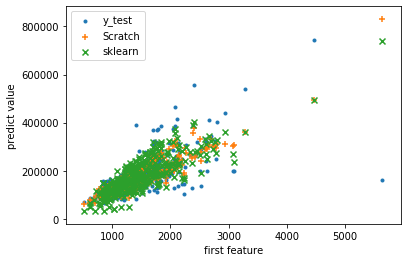

In [27]:
# 最初の特徴量に対する予測値の分布
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test2[:, 0], y_test2, label='y_test', marker='.')
plt.scatter(X_test2[:, 0], y_slr_pred, label='Scratch', marker='+')
plt.scatter(X_test2[:, 0], y_pred, label='sklearn', marker='x')
plt.xlabel('first feature')
plt.ylabel('predict value')
plt.legend();

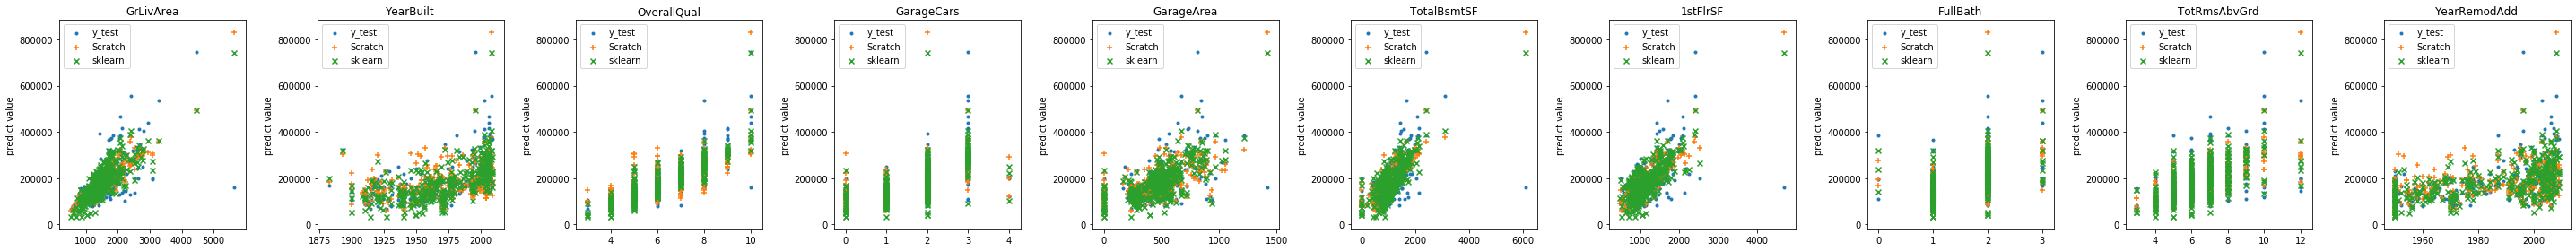

In [28]:
# 全ての特徴量に対する予測値の分布
fig = plt.figure(figsize=(len(features) * 4, 4))
for j in range(len(features)):
    ax = fig.add_subplot(1, len(features), j+1)
    ax.scatter(X_test2[:, j], y_test2, label='y_test', marker='.')
    ax.scatter(X_test2[:, j], y_slr_pred, label='Scratch', marker='+')
    ax.scatter(X_test2[:, j], y_pred, label='sklearn', marker='x')
    # 回帰式をプロット（他変数の影響を受けて意味がないことが発覚したため消去）
#     x = np.linspace(min(X_test2[:, j]), max(X_test2[:, j]), len(X_test2[:, j]))
#     y = [k * slr.coef_[j] + slr.intercept_ for k in x]
#     ax.plot(x, y, color='red', label='y = {:.2f}x + {:.2f}'.format(slr.coef_[j], slr.intercept_))
    ax.set_title(features[j])
    ax.set_ylabel('predict value')
    ax.legend()
fig.tight_layout();

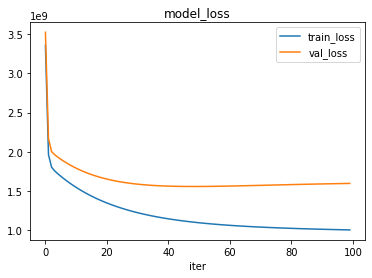

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(slr.iter)], slr.loss, label='train_loss')
plt.plot([i for i in range(slr.iter)], slr.val_loss, label='val_loss')
plt.title('model_loss')
plt.xlabel('iter')
plt.legend()
plt.show()

- 学習率を $10^{-7}$ まで減少させないと損失関数が減少していかなかった
- sklearnで予測した値と比べてみると、大きな傾向は合っているが一致しておらず差が生じている
- 特徴量のデータを標準化してみて試してみる（iter を100から1000回に増加）

In [30]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2_scl = scaler.transform(X_train2)
X_test2_scl = scaler.transform(X_test2)

In [31]:
# Scratchの学習と推定
slr = ScratchLinearRegression(num_iter=1000, lr=0.1, verbose=True, random_state=0)
slr.fit(X_train2_scl, y_train2, X_test2_scl, y_test2)
y_slr_pred = slr.predict(X_test2_scl)

iter:1
coef_:[5703.91126491 4133.28204469 6210.91419963 5180.5654547  5063.08234843
 4962.26688932 4840.75866342 4528.35755502 4318.87666809 4070.94420962]
intercept_:18073.444616382996
train_loss:14520237811.612278
val_loss:14789961890.242466
iter:2
coef_:[8655.84161766 6044.97253272 9480.70687456 7500.48395188 7372.87017845
 7464.93978788 7192.69519014 6463.12311738 6396.17613993 6002.47658823]
intercept_:34339.41513191364
train_loss:11579487307.072363
val_loss:11885291795.202585
iter:3
coef_:[10273.78469928  6898.37801474 11325.56028841  8456.71847119
  8369.23466131  8772.6853138   8337.68689888  7159.00141809
  7387.32320919  6909.84812003]
intercept_:48978.78859589122
train_loss:9437935007.126448
val_loss:9777042741.845907
iter:4
coef_:[11240.43348254  7251.71327635 12474.8313963   8767.53857649
  8743.27194459  9495.66401211  8893.51456519  7267.66963068
  7849.57050207  7328.59546468]
intercept_:62154.22471347104
train_loss:7758366351.18833
val_loss:8117222904.25925
iter:5
coef

iter:146
coef_:[27677.39280301  8410.75244283 24529.61832095  2277.41726005
  7958.10691928 12381.58726217  5139.20105929 -4215.12619547
  1159.24185248  6610.38919565]
intercept_:180733.1120627907
train_loss:619310197.1982745
val_loss:1052340605.2616435
iter:147
coef_:[27708.66932783  8417.12529686 24523.81504216  2267.92148213
  7964.44866727 12384.27031125  5131.57829017 -4220.86513415
  1139.72686634  6609.36733514]
intercept_:180733.11583368058
train_loss:619293675.8077664
val_loss:1052483822.3641124
iter:148
coef_:[27739.52762185  8423.41453596 24518.02402129  2258.54642247
  7970.72439948 12386.93622876  5124.05236134 -4226.4947638
  1120.47157291  6608.37665848]
intercept_:180733.11922748148
train_loss:619277583.8376688
val_loss:1052625719.414187
iter:149
coef_:[27769.97350737  8429.62118174 24512.24736541  2249.29038946
  7976.93460503 12389.58497428  5116.62170343 -4232.01783481
  1101.47254541  6607.41622525]
intercept_:180733.12228190227
train_loss:619261909.8912714
val_los

iter:274
coef_:[29612.72349615  8804.27740557 24068.74278394  1665.05281309
  8394.5129219  12596.49375382  4638.19177239 -4522.09578261
   -43.64908416  6577.57697832]
intercept_:180733.14977163702
train_loss:618691944.0378944
val_loss:1062418083.643846
iter:275
coef_:[29618.46833622  8805.43080222 24067.13972665  1663.07307718
  8396.01179644 12597.34948285  4636.52043128 -4522.8992395
   -47.17741069  6577.5583798 ]
intercept_:180733.14977164226
train_loss:618691350.971521
val_loss:1062452315.3767364
iter:276
coef_:[29624.13817521  8806.56897107 24065.55662532  1661.11688015
  8397.49352578 12598.19615542  4634.86876696 -4523.69169978
   -50.65915822  6577.54040084]
intercept_:180733.14977164697
train_loss:618690773.0395534
val_loss:1062486136.120705
iter:277
coef_:[29629.73399559  8807.692115   24063.99324581  1659.183937
  8398.95830631 12599.03385305  4633.23655567 -4524.4733189
   -54.09494531  6577.52302345]
intercept_:180733.14977165122
train_loss:618690209.8550363
val_loss:10

iter:417
coef_:[29985.8492328   8878.79402943 23962.60700685  1527.98763558
  8500.43220535 12657.89861769  4523.42532487 -4572.94851505
  -271.33220242  6577.21682769]
intercept_:180733.14977168932
train_loss:618669250.2762648
val_loss:1064744618.2177851
iter:418
coef_:[29986.72945512  8878.96897291 23962.3516984   1527.62136334
  8500.72422257 12658.06367915  4523.13154528 -4573.06347928
  -271.86382027  6577.21850753]
intercept_:180733.14977168932
train_loss:618669235.3779119
val_loss:1064750515.7181765
iter:419
coef_:[29987.59821532  8879.14163978 23962.09969108  1527.25933335
  8501.01294573 12658.22674976  4522.8413926  -4573.17689717
  -272.38846702  6577.22018494]
intercept_:180733.14977168932
train_loss:618669220.8571646
val_loss:1064756340.5507809
iter:420
coef_:[29988.45566267  8879.31205987 23961.85094254  1526.90149578
  8501.29841241 12658.38785252  4522.55482288 -4573.28878949
  -272.90623423  6577.22185962]
intercept_:180733.14977168932
train_loss:618669206.7044325
val_

iter:553
coef_:[30042.07034698  8889.99398387 23946.26217593  1502.75550054
  8520.84420132 12668.84728214  4504.11063068 -4580.13504611
  -305.14858304  6577.37947441]
intercept_:180733.14977168932
train_loss:618668679.4890265
val_loss:1065134582.908475
iter:554
coef_:[30042.21829038  8890.02370759 23946.2191721   1502.67905492
  8520.90747976 12668.8775618   4504.05752272 -4580.15317978
  -305.23696182  6577.38014556]
intercept_:180733.14977168932
train_loss:618668679.0284989
val_loss:1065135676.4820516
iter:555
coef_:[30042.36430476  8890.05304815 23946.17673121  1502.60347533
  8520.97005696 12668.90745803  4504.00508504 -4580.17106768
  -305.32418188  6577.38081055]
intercept_:180733.14977168932
train_loss:618668678.5795361
val_loss:1065136756.6239189
iter:556
coef_:[30042.50841525  8890.08201053 23946.13484594  1502.52875182
  8521.03194079 12668.93697559  4503.95330925 -4580.18871313
  -305.41025839  6577.3814694 ]
intercept_:180733.14977168932
train_loss:618668678.1418464
val_l

iter:690
coef_:[30051.53196751  8891.91256277 23943.52332831  1497.40581857
  8525.32642259 12670.81030037  4500.64921773 -4581.26335706
  -310.78103276  6577.43049427]
intercept_:180733.14977168932
train_loss:618668661.6649663
val_loss:1065207358.2994334
iter:691
coef_:[30051.55638912  8891.91762103 23943.51633934  1497.38950762
  8525.34035136 12670.81544251  4500.63999746 -4581.26610585
  -310.79547689  6577.43066496]
intercept_:180733.14977168932
train_loss:618668661.6504713
val_loss:1065207561.1710422
iter:692
coef_:[30051.58049098  8891.92261456 23943.50944311  1497.3733777
  8525.35412837 12670.8205176   4500.63089488 -4581.2688166
  -310.80973081  6577.43083387]
intercept_:180733.14977168932
train_loss:618668661.6363342
val_loss:1065207761.5780252
iter:693
coef_:[30051.60427726  8891.92754417 23943.5026384   1497.35742677
  8525.3677553  12670.82552651  4500.62190848 -4581.27148983
  -310.82379704  6577.43100103]
intercept_:180733.14977168932
train_loss:618668661.6225466
val_lo

iter:825
coef_:[30053.08069985  8892.23868312 23943.08468864  1496.25850315
  8526.31592724 12671.13619631  4500.05510355 -4581.43067524
  -311.69349062  6577.44281811]
intercept_:180733.14977168932
train_loss:618668661.0957798
val_loss:1065220882.7011249
iter:826
coef_:[30053.08479686  8892.23957657 23943.08355538  1496.25483827
  8526.31913659 12671.13705124  4500.0534854  -4581.43107947
  -311.69588588  6577.44285863]
intercept_:180733.14977168932
train_loss:618668661.0952643
val_loss:1065220922.1224431
iter:827
coef_:[30053.08883983  8892.24045865 23943.08243745  1496.25121334
  8526.32231148 12671.13789474  4500.05188803 -4581.43147786
  -311.69824932  6577.44289872]
intercept_:180733.14977168932
train_loss:618668661.0947615
val_loss:1065220961.0719934
iter:828
coef_:[30053.09282948  8892.24132951 23943.08133463  1496.24762792
  8526.32545228 12671.13872695  4500.05031117 -4581.43187049
  -311.70058134  6577.44293838]
intercept_:180733.14977168932
train_loss:618668661.0942706
val_

iter:959
coef_:[30053.33843198  8892.2963469  23943.01472705  1495.99907504
  8526.54492762 12671.18932466  4499.95149271 -4581.45437727
  -311.84338202  6577.44570708]
intercept_:180733.14977168932
train_loss:618668661.0750521
val_loss:1065223528.060718
iter:960
coef_:[30053.33911677  8892.29650847 23943.01454884  1495.99822195
  8526.54568977 12671.18946156  4499.95120765 -4581.45443051
  -311.84377592  6577.44571665]
intercept_:180733.14977168932
train_loss:618668661.0750314
val_loss:1065223536.0250953
iter:961
coef_:[30053.33979242  8892.296668   23943.01437312  1495.99737803
  8526.54644384 12671.18959657  4499.95092627 -4581.45448291
  -311.8441645   6577.44572611]
intercept_:180733.14977168932
train_loss:618668661.0750109
val_loss:1065223543.8958457
iter:962
coef_:[30053.34045905  8892.29682552 23943.01419985  1495.99654316
  8526.54718991 12671.18972971  4499.95064853 -4581.45453448
  -311.84454784  6577.44573547]
intercept_:180733.14977168932
train_loss:618668661.0749912
val_l

In [32]:
# sklearnの学習と推定
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train2_scl, y_train2)
y_pred = lr.predict(X_test2_scl)

In [33]:
# スクラッチの係数、切片
slr.coef_, slr.intercept_

(array([30053.36015652,  8892.30154263, 23943.00913833,  1495.97065464,
         8526.57037933, 12671.19362825,  4499.94237272, -4581.45598616,
         -311.85584283,  6577.44602579]),
 180733.14977168932)

In [34]:
# sklearnの係数、切片
lr.coef_, lr.intercept_

(array([30053.38915921,  8892.30919032, 23943.00233956,  1495.91900196,
         8526.61721861, 12671.19894383,  4499.92945133, -4581.45732698,
         -311.87212722,  6577.44660394]),
 180733.14977168944)

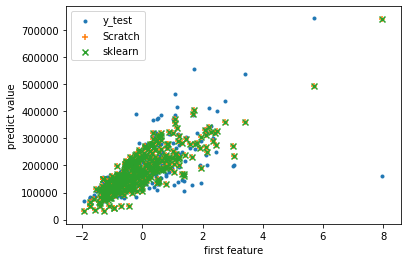

In [35]:
# 最初の特徴量に対する予測値の分布
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test2_scl[:, 0], y_test2, label='y_test', marker='.')
plt.scatter(X_test2_scl[:, 0], y_slr_pred, label='Scratch', marker='+')
plt.scatter(X_test2_scl[:, 0], y_pred, label='sklearn', marker='x')
plt.xlabel('first feature')
plt.ylabel('predict value')
plt.legend();

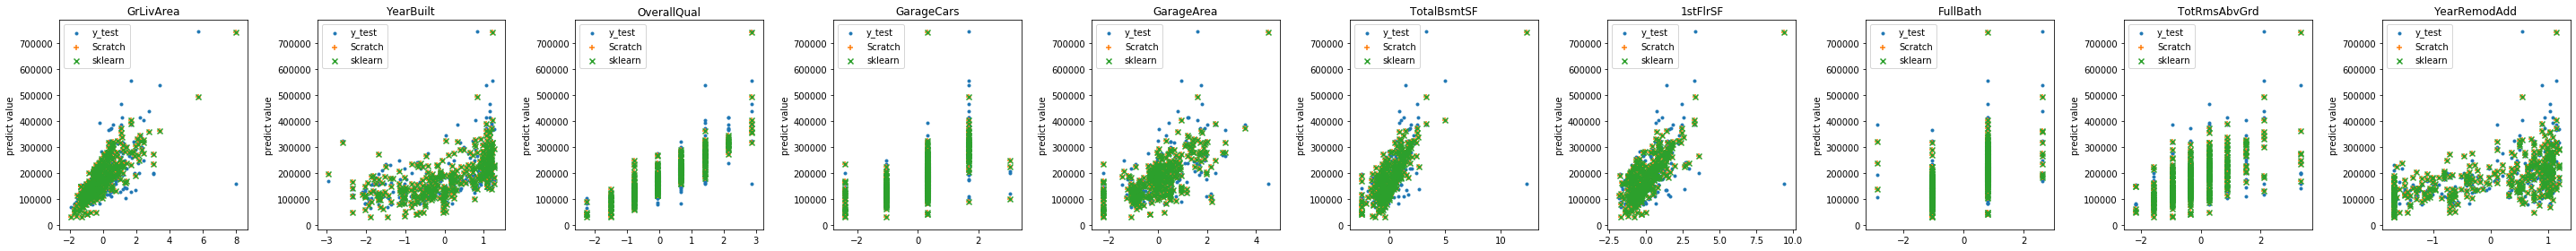

In [36]:
# 全ての特徴量に対する予測値の分布
fig = plt.figure(figsize=(len(features) * 4, 4))
for j in range(len(features)):
    ax = fig.add_subplot(1, len(features), j+1)
    ax.scatter(X_test2_scl[:, j], y_test2, label='y_test', marker='.')
    ax.scatter(X_test2_scl[:, j], y_slr_pred, label='Scratch', marker='+')
    ax.scatter(X_test2_scl[:, j], y_pred, label='sklearn', marker='x')
    # 回帰式をプロット（他変数の影響を受けて意味がないことが発覚したため消去）
#     x = np.linspace(min(X_test2_scl[:, j]), max(X_test2_scl[:, j]), len(X_test2_scl[:, j]))
#     y = [k * slr.coef_[j] + slr.intercept_ for k in x]
#     ax.plot(x, y, color='red', label='y = {:.2f}x + {:.2f}'.format(slr.coef_[j], slr.intercept_))
    ax.set_title(features[j])
    ax.set_ylabel('predict value')
    ax.legend()
fig.tight_layout();

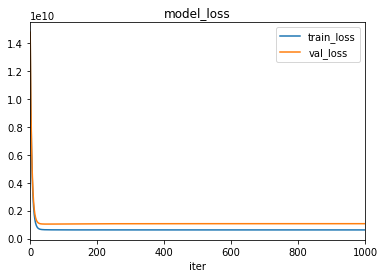

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(slr.iter)], slr.loss, label='train_loss')
plt.plot([i for i in range(slr.iter)], slr.val_loss, label='val_loss')
plt.title('model_loss')
plt.xlabel('iter')
plt.legend()
plt.xlim(0, 1000)
plt.show()

- 特徴量を標準化してみると、sklearnとほぼ一致した値になった
- 特徴量を標準化しないと上手くフィットしなかった原因は？
    - スクラッチにて、係数、切片の初期設定を平均０、分散１の正規分布で設定しているからか？　原因調査を行う

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 
$\theta_0$
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [38]:
# Scratchの学習と推定、バイアス項含む
slr_withbias = ScratchLinearRegression(num_iter=100, lr=0.1, verbose=True, random_state=0)
slr_withbias.fit(X_train2_scl, y_train2, X_test2_scl, y_test2)
y_slr_withbias_pred = slr_withbias.predict(X_test2_scl)

iter:1
coef_:[5703.91126491 4133.28204469 6210.91419963 5180.5654547  5063.08234843
 4962.26688932 4840.75866342 4528.35755502 4318.87666809 4070.94420962]
intercept_:18073.444616382996
train_loss:14520237811.612278
val_loss:14789961890.242466
iter:2
coef_:[8655.84161766 6044.97253272 9480.70687456 7500.48395188 7372.87017845
 7464.93978788 7192.69519014 6463.12311738 6396.17613993 6002.47658823]
intercept_:34339.41513191364
train_loss:11579487307.072363
val_loss:11885291795.202585
iter:3
coef_:[10273.78469928  6898.37801474 11325.56028841  8456.71847119
  8369.23466131  8772.6853138   8337.68689888  7159.00141809
  7387.32320919  6909.84812003]
intercept_:48978.78859589122
train_loss:9437935007.126448
val_loss:9777042741.845907
iter:4
coef_:[11240.43348254  7251.71327635 12474.8313963   8767.53857649
  8743.27194459  9495.66401211  8893.51456519  7267.66963068
  7849.57050207  7328.59546468]
intercept_:62154.22471347104
train_loss:7758366351.18833
val_loss:8117222904.25925
iter:5
coef

In [39]:
# スクラッチの係数、切片
slr_withbias.coef_, slr_withbias.intercept_

(array([25662.34121864,  8008.81868629, 24736.03963302,  2882.15645765,
         7589.169566  , 12240.97242159,  5633.67643913, -3756.53490797,
         2406.56780624,  6714.79231891]),
 180728.34925023213)

In [40]:
# Scratchの学習と推定、バイアス項抜く
slr_nobias = ScratchLinearRegression(num_iter=100, lr=0.1, verbose=True, random_state=0, no_bias=True)
slr_nobias.fit(X_train2_scl, y_train2, X_test2_scl, y_test2)
y_slr_nobias_pred = slr_nobias.predict(X_test2_scl)

iter:1
coef_:[5703.91126491 4133.28204469 6210.91419963 5180.5654547  5063.08234843
 4962.26688932 4840.75866342 4528.35755502 4318.87666809 4070.94420962]
train_loss:17623383684.20463
val_loss:17900122640.409077
iter:2
coef_:[8655.84161766 6044.97253272 9480.70687456 7500.48395188 7372.87017845
 7464.93978788 7192.69519014 6463.12311738 6396.17613993 6002.47658823]
train_loss:17196160249.37978
val_loss:17508770114.824604
iter:3
coef_:[10273.78469928  6898.37801474 11325.56028841  8456.71847119
  8369.23466131  8772.6853138   8337.68689888  7159.00141809
  7387.32320919  6909.84812003]
train_loss:17090564875.903072
val_loss:17434147569.616196
iter:4
coef_:[11240.43348254  7251.71327635 12474.8313963   8767.53857649
  8743.27194459  9495.66401211  8893.51456519  7267.66963068
  7849.57050207  7328.59546468]
train_loss:17060121330.405005
val_loss:17420480114.440598
iter:5
coef_:[11885.30945511  7372.38542653 13279.7149265   8777.65415221
  8826.72077329  9928.47477126  9158.65266229  710

In [41]:
# スクラッチの係数、切片
slr_nobias.coef_, slr_nobias.intercept_

(array([25662.34121864,  8008.81868629, 24736.03963302,  2882.15645765,
         7589.169566  , 12240.97242159,  5633.67643913, -3756.53490798,
         2406.56780624,  6714.79231891]),
 None)

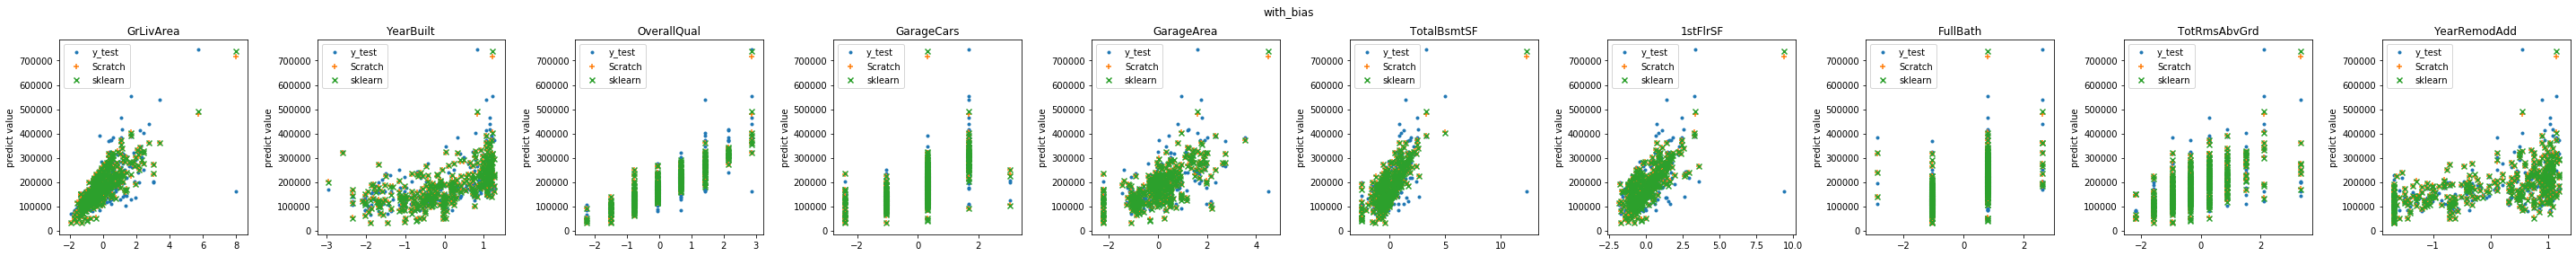

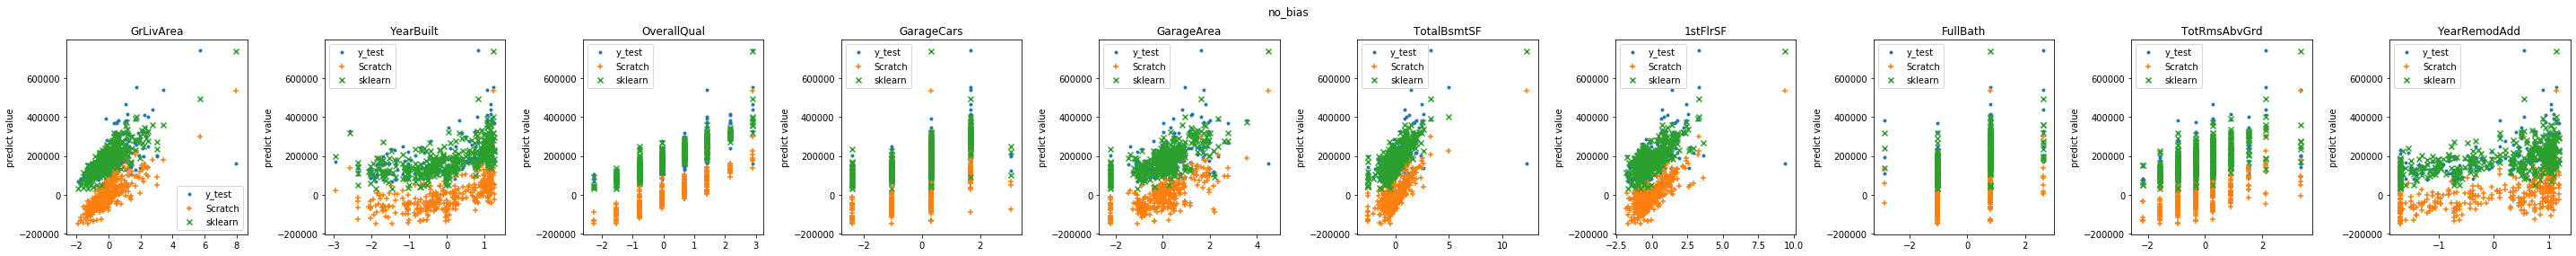

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
# with_biasのグラフ化
fig = plt.figure(figsize=(len(features) * 4, 4))
# 特徴量に対する予測値の分布
for j in range(len(features)):
    ax = fig.add_subplot(1, len(features), j+1)
    ax.scatter(X_test2_scl[:, j], y_test2, label='y_test', marker='.')
    ax.scatter(X_test2_scl[:, j], y_slr_withbias_pred, label='Scratch', marker='+')
    ax.scatter(X_test2_scl[:, j], y_pred, label='sklearn', marker='x')
#     # 回帰式をプロット（他変数の影響を受けて意味がないことが発覚したため消去）
#     x = np.linspace(min(X_test2_scl[:, j]), max(X_test2_scl[:, j]), len(X_test2_scl[:, j]))
#     y = [k * slr_withbias.coef_[j] + slr_withbias.intercept_ for k in x]
#     ax.plot(x, y, color='red', label='y = {:.2f}x + {:.2f}'.format(slr_withbias.coef_[j], slr_withbias.intercept_))
    ax.set_title(features[j])
    ax.set_ylabel('predict value')
    ax.legend()
fig.suptitle('with_bias')
fig.tight_layout()
fig.subplots_adjust(top=0.85);
# no_biasのグラフ化
fig = plt.figure(figsize=(len(features) * 4, 4))
# 特徴量に対する予測値の分布
for j in range(len(features)):
    ax = fig.add_subplot(1, len(features), j+1)
    ax.scatter(X_test2_scl[:, j], y_test2, label='y_test', marker='.')
    ax.scatter(X_test2_scl[:, j], y_slr_nobias_pred, label='Scratch', marker='+')
    ax.scatter(X_test2_scl[:, j], y_pred, label='sklearn', marker='x')
#     # 回帰式をプロット（他変数の影響を受けて意味がないことが発覚したため消去）
#     x = np.linspace(min(X_test2_scl[:, j]), max(X_test2_scl[:, j]), len(X_test2_scl[:, j]))
#     y = [k * slr_nobias.coef_[j] for k in x]
#     ax.plot(x, y, color='red', label='y = {:.2f}x + 0'.format(slr_nobias.coef_[j]))
    ax.set_title(features[j])
    ax.set_ylabel('predict value')
    ax.legend()
fig.suptitle('no_bias')
fig.tight_layout()
fig.subplots_adjust(top=0.85);

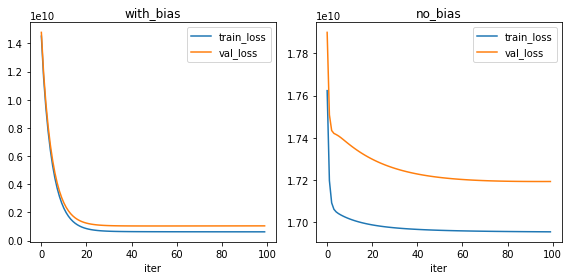

In [43]:
# 損失関数のプロット
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot([i for i in range(slr_withbias.iter)], slr_withbias.loss, label='train_loss')
ax.plot([i for i in range(slr_withbias.iter)], slr_withbias.val_loss, label='val_loss')
ax.set_title('with_bias')
ax.set_xlabel('iter')
plt.legend()
plt.tight_layout();
ax = fig.add_subplot(1, 2, 2)
ax.plot([i for i in range(slr_nobias.iter)], slr_nobias.loss, label='train_loss')
ax.plot([i for i in range(slr_nobias.iter)], slr_nobias.val_loss, label='val_loss')
ax.set_title('no_bias')
ax.set_xlabel('iter')
plt.legend()
plt.tight_layout()
plt.show()

- 損失関数の計算結果に若干の違いはあるが、係数の値はbiasあり、なしでも全く同じになる
- biasを設定しないと回帰直線の傾きは求められるが、目的変数の実績値と予測値の間に切片分の開きが生じてしまう
- 予測したい値が絶対量の場合は、切片分予測値に解離が出る。予測したい値が変化率などの場合は切片の有無は大きな影響はないと想定（損失関数の計算の仕方が若干変わるので、微弱な影響はあるか？）

## 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

In [44]:
import warnings
warnings.simplefilter('ignore')

１. House Price コンペティションのデータで検証

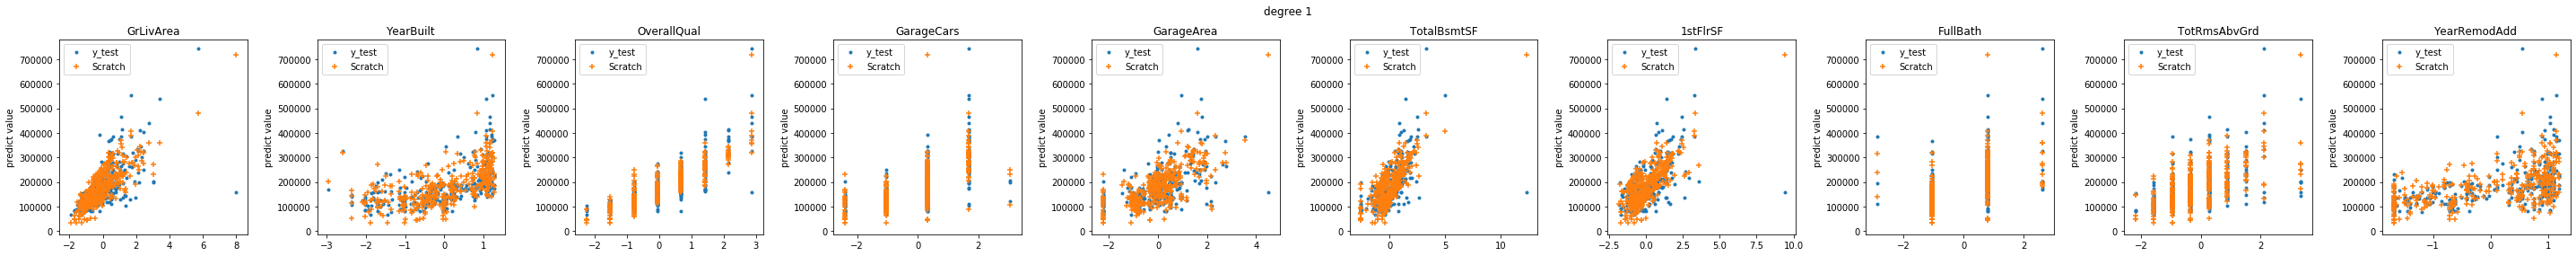

MSE : 2088638806.8551717
分散　: 6005716977.548707



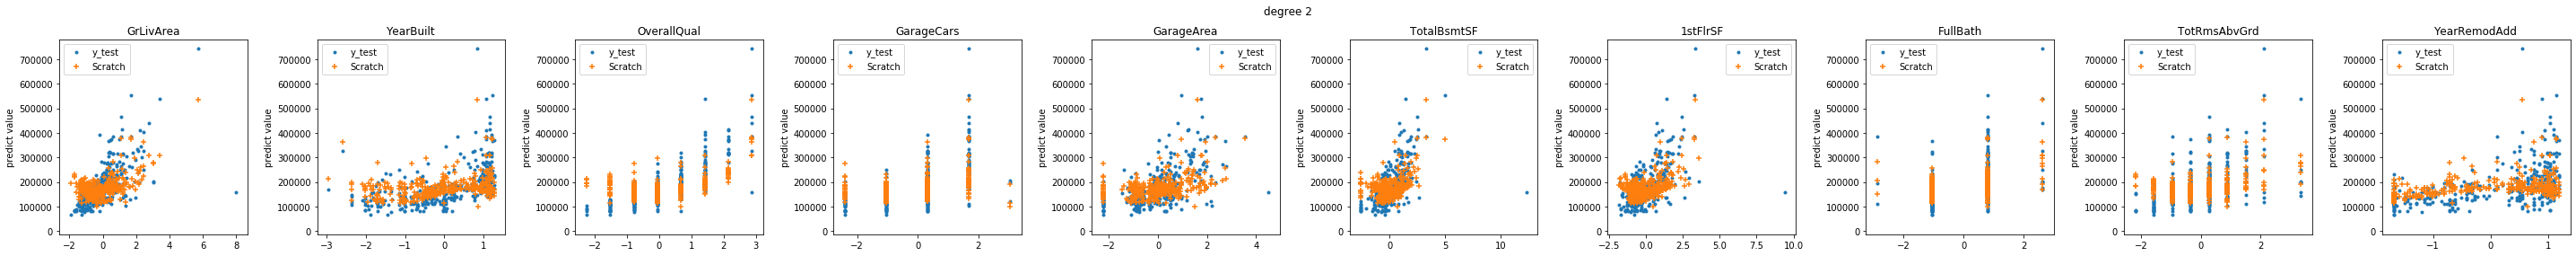

MSE : 9301925251.706554
分散　: 7045939419.551161



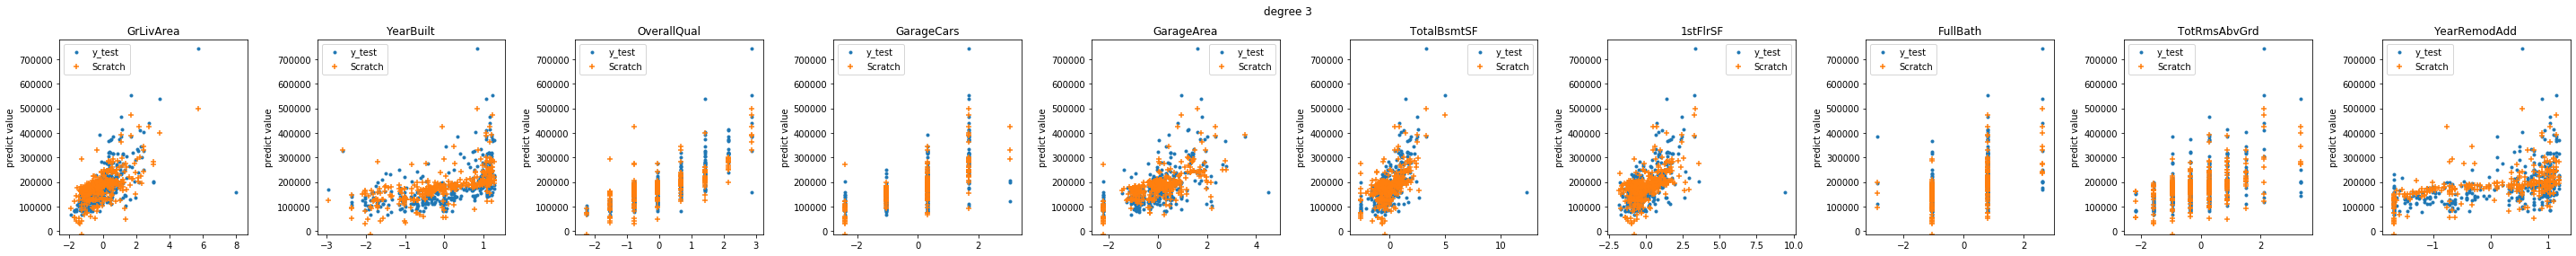

MSE : 13661675941.201273
分散　: 14811723314.863422



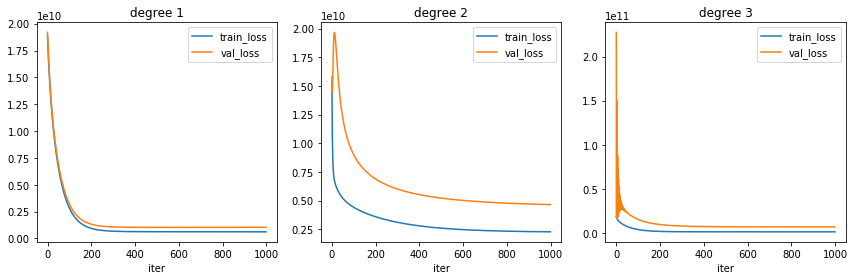

In [45]:
from statistics import mean, median,variance,stdev
import matplotlib.pyplot as plt
%matplotlib inline

# 使用する元のデータ
X_train3, y_train3, X_test3, y_test3 = X_train2_scl, y_train2, X_test2_scl, y_test2
num_features = X_test3.shape[1]
# 特徴量の1〜3乗に動かすためインスタンスを３つ用意
slr_d1 = ScratchLinearRegression(num_iter=1000, lr=0.01, verbose=False, random_state=0)
slr_d2 = ScratchLinearRegression(num_iter=1000, lr=0.01, verbose=False, random_state=0)
slr_d3 = ScratchLinearRegression(num_iter=1000, lr=0.01, verbose=False, random_state=0)
slr_lst = [slr_d1, slr_d2, slr_d3]
y_pred_lst = []
# 特徴量を1〜3乗に動かして学習、予測を行わせる
for i in range(len(slr_lst)):
    X_train3_exp =  np.power(X_train3, i+1)
    X_test3_exp = np.power(X_test3, i+1)
    slr_lst[i].fit(X_train3_exp, y_train3, X_test3_exp, y_test3)
    y_pred = slr_lst[i].predict(X_test3_exp)
    y_pred_lst.append(y_pred)

# 全ての特徴量に対する予測値の分布
y_lim = None
for i in range(len(slr_lst)):
    fig = plt.figure(figsize=(num_features * 4, 4))
    for j in range(num_features):
        ax = fig.add_subplot(1, num_features, j+1)
        ax.scatter(X_test3[:, j], y_test3, label='y_test', marker='.')
        ax.scatter(X_test3[:, j], y_pred_lst[i], label='Scratch', marker='+')
        ax.set_title(features[j])
        ax.set_ylabel('predict value')
        # 散布図で比較するために、y_limをdegree1の値で固定
        if y_lim == None:
            y_lim = ax.get_ylim()
        ax.set_ylim(y_lim)
        ax.legend()    
    fig.suptitle('degree {}'.format(i+1))
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    plt.show()
    # 最小二乗誤差を計算
    mse = MSE(y_pred_lst[i], y_test3)
    print('MSE : {}'.format(mse))
    # 分散を計算
    mean = y_pred_lst[i].mean()
    variance = np.power(y_pred_lst[i]-mean, 2).sum() / len(y_pred_lst[i])
    print('分散　: {}'.format(variance))
    print()

# 損失関数をプロット
fig = plt.figure(figsize=(len(slr_lst) * 4, 4))
for i in range(len(slr_lst)):
    ax = fig.add_subplot(1, len(slr_lst), i+1)
    ax.plot([i for i in range(slr_lst[i].iter)], slr_lst[i].loss, label='train_loss')
    ax.plot([i for i in range(slr_lst[i].iter)], slr_lst[i].val_loss, label='val_loss')
    ax.set_title('degree {}'.format(i+1))
    ax.legend()
    ax.set_xlabel('iter')
fig.tight_layout()
plt.show()

2. notebook冒頭で作成したrandom のデータで検証

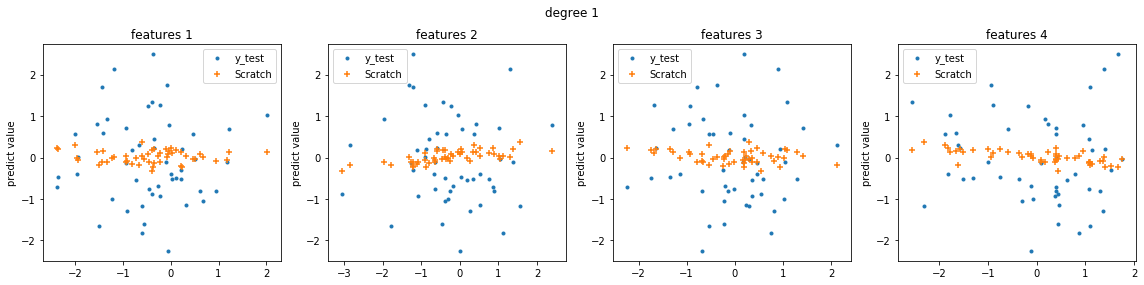

MSE : 1.0982388904661071
分散　: 0.022246707615184422



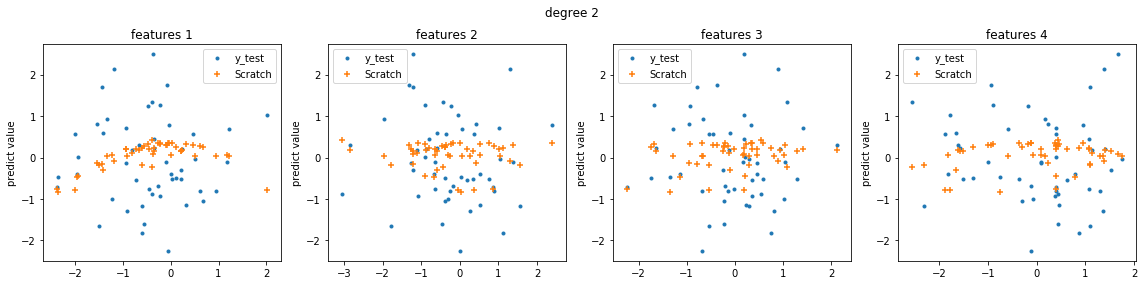

MSE : 1.2815564846569378
分散　: 0.10317452137027219



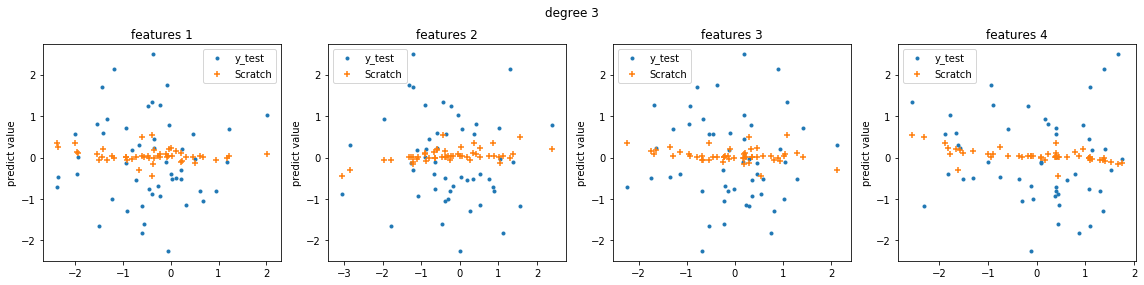

MSE : 1.0937509501614573
分散　: 0.02723983585517422



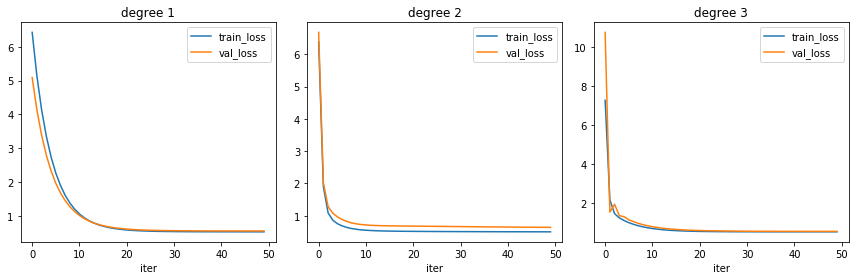

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

# 使用する元のデータ
X_train3, y_train3, X_test3, y_test3 = X_train, y_train, X_test, y_test
num_features = X_test3.shape[1]
# 特徴量の1〜3乗に動かすためインスタンスを３つ用意
slr_d1 = ScratchLinearRegression(num_iter=50, lr=0.1, verbose=False, random_state=0)
slr_d2 = ScratchLinearRegression(num_iter=50, lr=0.1, verbose=False, random_state=0)
slr_d3 = ScratchLinearRegression(num_iter=50, lr=0.1, verbose=False, random_state=0)
slr_lst = [slr_d1, slr_d2, slr_d3]
y_pred_lst = []
# 特徴量を1〜3乗に動かして学習、予測を行わせる
for i in range(len(slr_lst)):
    X_train3_exp =  np.power(X_train3, i+1)
    X_test3_exp = np.power(X_test3, i+1)
    slr_lst[i].fit(X_train3_exp, y_train3, X_test3_exp, y_test3)
    y_pred = slr_lst[i].predict(X_test3_exp)
    y_pred_lst.append(y_pred)

# 全ての特徴量に対する予測値の分布
y_lim = None
for i in range(len(slr_lst)):
    fig = plt.figure(figsize=(num_features * 4, 4))
    for j in range(num_features):
        ax = fig.add_subplot(1, num_features, j+1)
        ax.scatter(X_test3[:, j], y_test3, label='y_test', marker='.')
        ax.scatter(X_test3[:, j], y_pred_lst[i], label='Scratch', marker='+')
        ax.set_title('features {}'.format(j+1))
        ax.set_ylabel('predict value')
        # 散布図で比較するために、y_limをdegree1の値で固定
        if y_lim == None:
            y_lim = ax.get_ylim()
        ax.set_ylim(y_lim)
        ax.legend()    
    fig.suptitle('degree {}'.format(i+1))
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    plt.show()
    # 最小二乗誤差を計算
    mse = MSE(y_pred_lst[i], y_test3)
    print('MSE : {}'.format(mse))
    # 分散を計算
    mean = y_pred_lst[i].mean()
    variance = np.power(y_pred_lst[i]-mean, 2).sum() / len(y_pred_lst[i])
    print('分散　: {}'.format(variance))
    print()

# 損失関数をプロット
fig = plt.figure(figsize=(len(slr_lst) * 4, 4))
for i in range(len(slr_lst)):
    ax = fig.add_subplot(1, len(slr_lst), i+1)
    ax.plot([i for i in range(slr_lst[i].iter)], slr_lst[i].loss, label='train_loss')
    ax.plot([i for i in range(slr_lst[i].iter)], slr_lst[i].val_loss, label='val_loss')
    ax.set_title('degree {}'.format(i+1))
    ax.legend()
    ax.set_xlabel('iter')
fig.tight_layout()
plt.show()

- 特徴量の2乗、3乗で分布、誤差などを可視化してみたが、大きな精度の向上は見られなかった
- しかし、調査してみると線形回帰モデルでは有用であるとの情報もあるため、どのような条件のときに有用であるか調査、検証が必要

[参考](https://aizine.ai/feature-engineering0612/#toc4)

## 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$
以下の式から説明をはじめることができます。
$$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\
$$
目的関数（損失関数） $J(\theta)$ は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

- まず、簡単な数式でイメージしてみる
- 目的関数を　$x$ の２次関数で定義する（変数$\theta$（特徴量）が１つの場合）
$$
f(x)=x^2-4x+5
$$

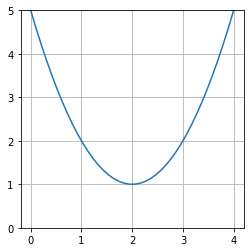

In [47]:
def f(X):
    return X**2 -4*X + 5
X = np.linspace(0, 4, 40)
Y = f(X)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X, Y)
ax.set_ylim(0, 5)
ax.grid();

- 適当な点、$x=3$　にて、微分を行い、傾きを求めてみる

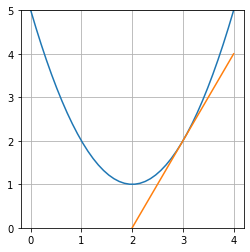

In [48]:
#　微分して傾きを求める
def df(x):
    return 2*x -4
# 接線の方程式
def tangent(x, X):
    a = df(x)
    b = f(x) - a*x
    return a * X + b

x = 3
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X, Y)
ax.plot(X, tangent(x, X))
ax.set_ylim(0, 5)
ax.grid();

- 目的関数$f(x)$の最小値を求めたいので、傾きが少しずつ小さくなるように繰り返してみる
- xを目的関数で微分した結果の差を随時更新していくようにする

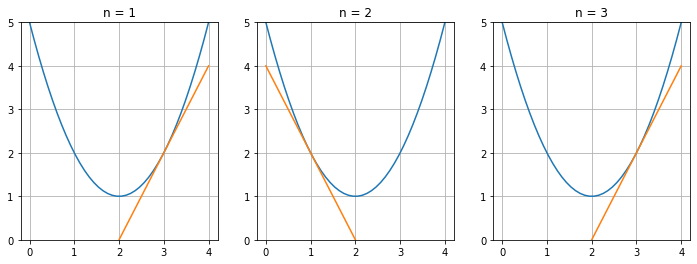

In [49]:
x = 3
n = 3
fig = plt.figure(figsize=(4 * n, 4))
for i in range(n):
    ax = fig.add_subplot(1, n, i+1)
    ax.plot(X, Y)
    ax.plot(X, tangent(x, X))
    ax.set_ylim(0, 5)
    ax.set_title('n = {}'.format(i+1))
    ax.grid();
    x = x - df(x)

- 学習率$\alpha$を定めないと、絶対値が同じ傾きで処理を繰り返してしまうので、$\alpha$を定義

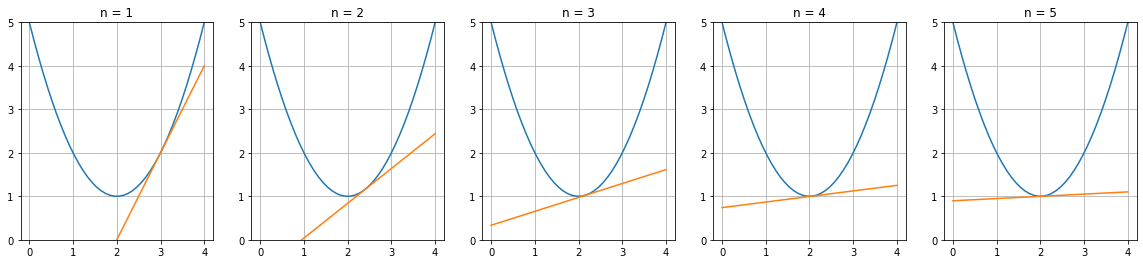

In [50]:
x = 3
n = 5
alpha = 0.3
fig = plt.figure(figsize=(4 * n, 4))
for i in range(n):
    ax = fig.add_subplot(1, n, i+1)
    ax.plot(X, Y)
    ax.plot(X, tangent(x, X))
    ax.set_ylim(0, 5)
    ax.set_title('n = {}'.format(i+1))
    ax.grid();
    x = x - df(x) * alpha

- 繰り返し回数を重ねると最小値に近づいていくことが確認できた
- 目的関数の特徴量を微分して算出した値に学習率を乗じて特徴量を更新していくと、目的関数の最小値に近づいていく

- 特徴量の数を２つにして確認する、以下の目的関数を導入
$$
f(x, y)=6x^2-xy+y^2+x+2y
$$

In [51]:
def f2(X, Y):
    return 6*X**2 - X*Y + Y**2 + X + 2*Y

def df2(x, y):
    return 12*x - y + 1, -x + 2*y + 2

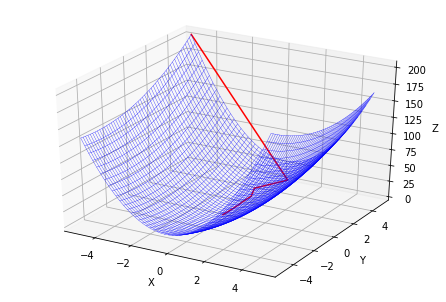

In [52]:
x, y = -5, 5
z = f2(x, y)
alpha = 0.1
n = 10
x_point, y_point, z_point = [x], [y], [z]
for i in range(n):
    x1, y1 = df2(x, y)
    x -= x1*alpha
    y -= y1*alpha
    z = f2(x, y)
    
    x_point.append(x)
    y_point.append(y)
    z_point.append(z)

#3次元プロットするためのモジュール
from mpl_toolkits.mplot3d import Axes3D
#グラフの枠を作っていく
fig = plt.figure()
ax = Axes3D(fig)
#軸にラベルを付けたいときは書く
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# X, Yの範囲の配列
X = np.linspace(-5, 5, 1000)
Y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(X, Y)

Z = f2(X, Y)

# ワイヤーフレームのプロット。linewidthは曲面のメッシュの線の太さ，をそれぞれ表す。
ax.plot_wireframe(X, Y, Z, color='blue', linewidth=0.3)
ax.plot(x_point, y_point, z_point, color='red')
plt.show()

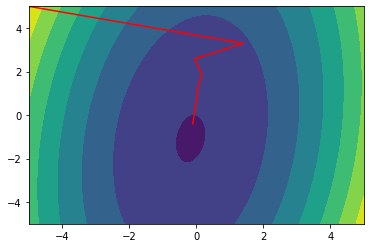

In [53]:
# 等高線のプロット
X = np.linspace(-5, 5, 1000)
Y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(X, Y)
Z = f2(X, Y)

plt.contourf(X, Y, Z)
plt.plot(x_point, y_point, color='red'); 

- 特徴量の数を増やしても同様の状況が確認できた

## 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

目的関数（損失関数） $J(\theta)$ は次の式で定義した。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$
$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解値

目的変数の式を展開する

$$
J(\theta)=  \frac{1}{2m}  (\sum_{i=1}^{m} h_\theta(x^{(i)})^2 - 2\sum_{i=1}^{m} h_\theta(x^{(i)}) \sum_{i=1}^{m}  y^{(i)} + \sum_{i=1}^{m} y^{(i)2})
$$

$\sum_{i=1}^{m} h_\theta(x^{(i)}) = a$, $\sum_{i=1}^{m} y^{(i)2} = b$とおくと、

$$
J(\theta) = \frac{1}{2m} (a - b)^2
$$
となり、２次関数の下に凸なグラフであり、$a=b$　で最小値をとる事が伺える。

また、$(a-b)^2$のグラフを描画してみると、複数の極値を持たない事も伺えるため、線形回帰では、目的関数が下に凸な二次関数であるため、学習を続ければ必ず最適解を持つことがわかる。

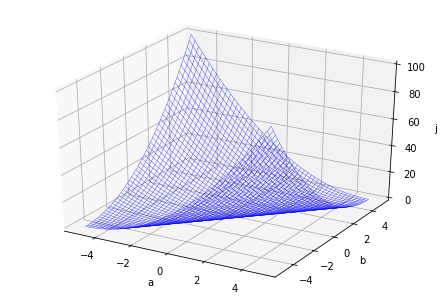

In [54]:
def j_theta(a, b):
    return a**2 - 2*a*b + b**2

#3次元プロットするためのモジュール
from mpl_toolkits.mplot3d import Axes3D
#グラフの枠を作っていく
fig = plt.figure()
ax = Axes3D(fig)
#軸にラベルを付けたいときは書く
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("j")

# X, Yの範囲の配列
a = np.linspace(-5, 5, 1000)
b = np.linspace(-5, 5, 1000)
a, b = np.meshgrid(a, b)

j = j_theta(a, b)

# ワイヤーフレームのプロット。linewidthは曲面のメッシュの線の太さ，をそれぞれ表す。
ax.plot_wireframe(a, b, j, color='blue', linewidth=0.3)
plt.show()